# <b> <font color="blue" size="40"> Logistic Regression </font> </b>

## <font color=blue> Microchip accepted or not decision making via logistic regression with regularisation </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('Material_By_DeepLearning')
from utils import *
import copy
import math

%matplotlib inline

### 3.1 Problem Statement

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. 
- From these two tests, you would like to determine whether the microchips should be accepted or rejected. 
- To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.


### Loading data

In [2]:
data = np.loadtxt('./data/ex2data2.txt', delimiter=',')
x_train = data[:,:2]
y_train = data[:,2]
# print(x_train)
# print(y_train)

### Let's plot the data

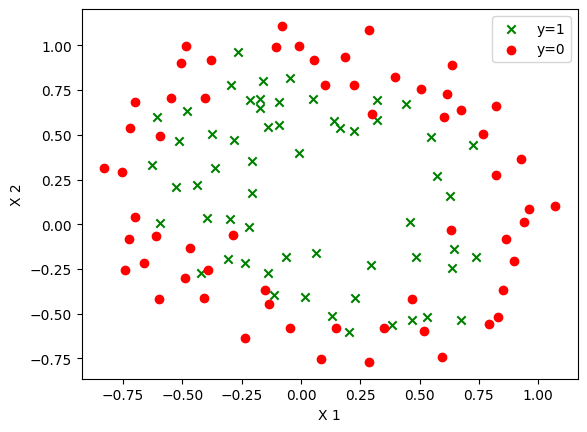

In [3]:
def plt_data(ax,x,y):
    pos = y==1
    neg = y==0
    
    ax.scatter(x[pos,0],x[pos,1],marker="x",c="green",label="y=1")
    ax.scatter(x[neg,0],x[neg,1],marker="o",c="red",label="y=0")
    ax.set_xlabel("X 1")
    ax.set_ylabel("X 2")
    ax.legend()

_,ax = plt.subplots(1,1)
plt_data(ax,x_train,y_train)
plt.show()

### Cost Calculation Function

In [4]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return (1/(1+np.exp(-z)))

def Compute_Cost_Regu(x, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
    Returns:
      total_cost : (scalar) cost 
    """
    total_cost = 0
    size_of_data = x.shape[0]
    
    for i in range(0,size_of_data):
        
        f_wb = sigmoid(np.dot(x[i],w)+b)
        total_cost += -(((y[i])*(np.log(f_wb))) + ((1-y[i])*(np.log(1-f_wb))))
        
    total_cost = total_cost/size_of_data
    
    # regularization
    
    sum_w = 0
    for i in range(len(w)):
        sum_w += (w[i])**2
    
    regu = (lambda_ / (2*size_of_data)) * sum_w
    
    total_cost = total_cost + regu
    
    return total_cost



### Let's test the cost function 

In [5]:
X_mapped = map_feature(x_train[:, 0], x_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = Compute_Cost_Regu(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

# ideal output
# Regularized cost : 0.6618252552483948

Regularized cost : 0.6618252552483948


### Differentiation calculation function 

In [6]:
def Compute_Gradient_regu(x, y, w, b, lambda_=1):
    """
    Computes the gradient for logistic regression 
 ### Let's plot the data
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    
    row, col = x.shape
    dj_dw = np.zeros(col)
    dj_db = 0
    
    for i in range(0,row):
        
        f_wb = sigmoid(np.dot(w,x[i])+b)
        error = f_wb - y[i]
        
        for j in range(col):
            dj_dw[j] += error*x[i,j]
        
        dj_db += error
    dj_dw = dj_dw/row
    dj_db = dj_db/row
    
    #regularization

    for i in range(len(w)):
        dj_dw[i] += ((lambda_ / row)*w[i])

    
    return dj_dw,dj_db

### Let's test Compute_Gradient

In [7]:
X_mapped = map_feature(x_train[:, 0], x_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_dw, dj_db = Compute_Gradient_regu(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

# Ideal output
# dj_db: 0.07138288792343662
# First few elements of regularized dj_dw:
#  [-0.010386028450548701, 0.011409852883280122, 0.0536273463274574, 0.003140278267313462]

dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280122, 0.0536273463274574, 0.003140278267313462]


### Gradient Descent Algorithm for choosing optimal w and b

In [12]:
def compute_Gradient_Descent_Regu(x, y, w, b, alpha, iteration, lambda_ = 1):
    
    row,col = x.shape
    j_history = []

    for i in range(0,iteration):
        
        dj_dw,dj_db = Compute_Gradient_regu(x,y,w,b,lambda_)
        
        for j in range(col):
            w[j] -= alpha*dj_dw[j]
            
        b -= alpha * dj_db
        
        if(i<10000):
            j_history.append(Compute_Cost_Regu(x,y,w,b,lambda_))
            
        if(i%1000 == 0):
            print(f"iteration: {i} , and cost: {j_history[-1]}")
            
    return w ,b ,j_history

### Running algorithm to get w and b 

In [24]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01    

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history = compute_Gradient_Descent_Regu(X_mapped, y_train, initial_w, initial_b,  alpha, iterations, lambda_)

iteration: 0 , and cost: 0.7210188345400221
iteration: 1000 , and cost: 0.5874629876860554
iteration: 2000 , and cost: 0.5571493267445516
iteration: 3000 , and cost: 0.5331852187780525
iteration: 4000 , and cost: 0.513669211379471
iteration: 5000 , and cost: 0.49746116535166157
iteration: 6000 , and cost: 0.4837818783748566
iteration: 7000 , and cost: 0.47208058644395257
iteration: 8000 , and cost: 0.46195696269215014
iteration: 9000 , and cost: 0.45311293975968187


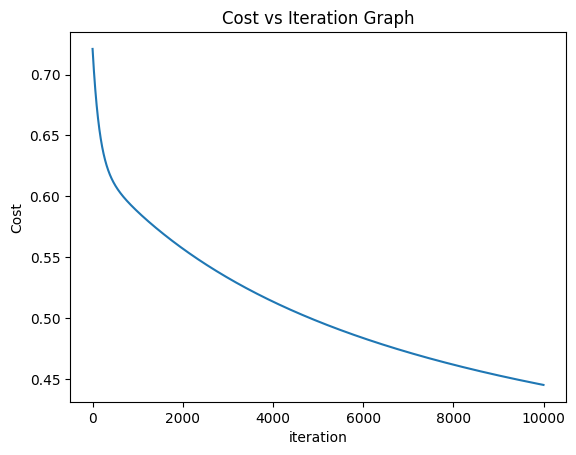

In [25]:
# Plot the iteration vs cost 
plt.plot(np.arange(len(J_history)),J_history)
plt.title('Cost vs Iteration Graph')
plt.xlabel('iteration')
plt.ylabel('Cost')
plt.show()

### Ploting decision boundary 

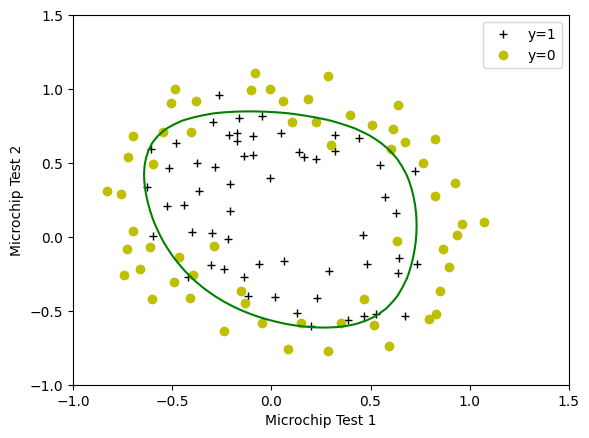

In [27]:
plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

### Making prediction function to make predictions on new data 

In [34]:
def pridect(x,w,b):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    Size_of_data = x.shape[0]
    p = np.zeros(Size_of_data)
    
    for i in range(0,Size_of_data):
        z = np.dot(x[i],w)+b
        f_wb = sigmoid(z)
        if(f_wb >= 0.5):
            p[i]=(1)
        else:
            p[i]=(0)
            
    return p 

### Now let's use this to compute the accuracy on the training set

In [37]:
#Compute accuracy on the training set
p = pridect(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390
